In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_csv('../data/le_monde.csv')

In [3]:
data

,title,date
0,"Guerre en Ukraine, en direct : incertitude sur...",NaN
1,« De guerre en guerre. De 1940 à l’Ukraine » :...,2023-01-12 20:00:00
2,L’Afrique subit toujours l’impact de la guerre...,NaN
3,Guerre en Ukraine : cinq réfugiés russes coinc...,NaN
4,"Dans l’Arctique, la guerre en Ukraine rebat le...",NaN
5,Human Rights Watch se félicite de la mobilisat...,2023-01-12 06:30:00
6,"Guerre en Ukraine, en direct : Volodymyr Zelen...",2023-01-12 19:14:00
7,Guerre en Ukraine : Kiev et ses alliés redoute...,2023-01-12 05:20:00
8,"Valéri Guerassimov, chef d’état-major de l’arm...",2023-01-12 11:08:00
9,Guerre en Ukraine : comprendre la bataille de ...,NaN


In [4]:
data['date']

0                     NaN
1     2023-01-12 20:00:00
2                     NaN
3                     NaN
4                     NaN
5     2023-01-12 06:30:00
6     2023-01-12 19:14:00
7     2023-01-12 05:20:00
8     2023-01-12 11:08:00
9                     NaN
10    2023-01-12 06:06:00
11    2023-01-11 06:20:00
12                    NaN
13                    NaN
14    2023-01-05 18:08:00
15    2023-01-10 18:53:00
16    2023-01-10 11:00:00
17    2023-01-09 22:31:00
18    2023-01-09 04:14:00
19    2023-01-08 18:00:00
20    2022-05-11 10:12:00
21    2022-05-24 07:46:00
22    2023-01-08 18:26:00
23    2023-01-08 12:11:00
24    2023-01-06 17:38:00
25    2023-01-08 06:37:00
Name: date, dtype: object

In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data['date'][1].month

1

In [7]:
data = data[data['date'].notna()]

In [8]:
data['date_short'] = data['date'].map(lambda dt: dt.strftime('%Y-%m-%d'))

/tmp/ipykernel_66020/2671504863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_short'] = data['date'].map(lambda dt: dt.strftime('%Y-%m-%d'))


In [9]:
df_dates = data.groupby('date_short').size().to_frame("count").reset_index()
df_dates

,date_short,count
0,2022-05-11,1
1,2022-05-24,1
2,2023-01-05,1
3,2023-01-06,1
4,2023-01-08,4
5,2023-01-09,2
6,2023-01-10,2
7,2023-01-11,1
8,2023-01-12,6


In [10]:
df_dates.sort_values('date_short')

,date_short,count
0,2022-05-11,1
1,2022-05-24,1
2,2023-01-05,1
3,2023-01-06,1
4,2023-01-08,4
5,2023-01-09,2
6,2023-01-10,2
7,2023-01-11,1
8,2023-01-12,6


<AxesSubplot: xlabel='date_short'>

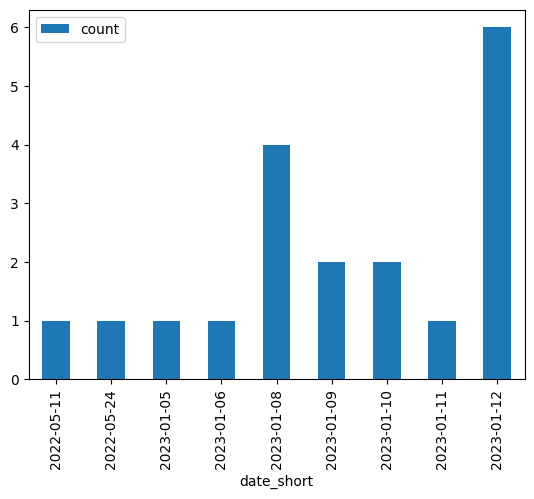

In [11]:
df_dates.plot(kind='bar', x='date_short', y='count')

# Graph

In [12]:
df_dates

,date_short,count
0,2022-05-11,1
1,2022-05-24,1
2,2023-01-05,1
3,2023-01-06,1
4,2023-01-08,4
5,2023-01-09,2
6,2023-01-10,2
7,2023-01-11,1
8,2023-01-12,6


<BarContainer object of 9 artists>

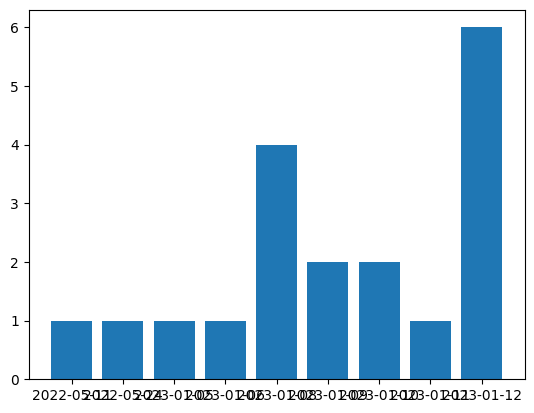

In [23]:
plt.bar(x='date_short', height='count', data=df_dates)

In [24]:
df_dates

,date_short,count
0,2022-05-11,1
1,2022-05-24,1
2,2023-01-05,1
3,2023-01-06,1
4,2023-01-08,4
5,2023-01-09,2
6,2023-01-10,2
7,2023-01-11,1
8,2023-01-12,6


In [29]:
df_dates['date_short'] = pd.to_datetime(df_dates['date_short'])

In [30]:
type(df_dates['date_short'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
df_dates[(df_dates['date_short'] > datetime(2023,1,5))
         & (df_dates['date_short'] < datetime(2023,1,9))]

,date_short,count
3,2023-01-06,1
4,2023-01-08,4
